# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/elcachorrohumano/workspace/MusicNN/data/tracks_audio_features_with_names.csv')


1. Missing values

In [3]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id                  0
track_name          1
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
like                0
dtype: int64


2. Summary statistics

In [4]:
print("\nSummary statistics:\n", df.describe())



Summary statistics:
        danceability       energy          key     loudness         mode  \
count   3484.000000  3484.000000  3484.000000  3484.000000  3484.000000   
mean       0.621004     0.653160     5.367681    -7.189480     0.629449   
std        0.162692     0.203483     3.552001     3.358367     0.483022   
min        0.066500     0.003790     0.000000   -31.414000     0.000000   
25%        0.509000     0.518000     2.000000    -8.702250     0.000000   
50%        0.635000     0.688000     6.000000    -6.485500     1.000000   
75%        0.750000     0.811000     9.000000    -4.861500     1.000000   
max        0.973000     0.997000    11.000000     0.811000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  3484.000000   3484.000000       3484.000000  3484.000000  3484.000000   
mean      0.079060      0.254088          0.083356     0.191246     0.540265   
std       0.076759      0.275879          0.212962     0.16035

3. Target variable distribution

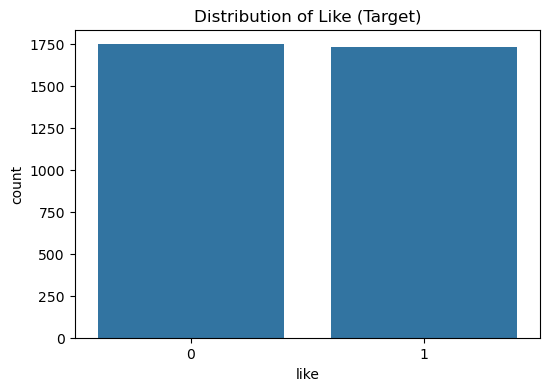

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='like', data=df)
plt.title('Distribution of Like (Target)')
plt.show()


4. Column distributions

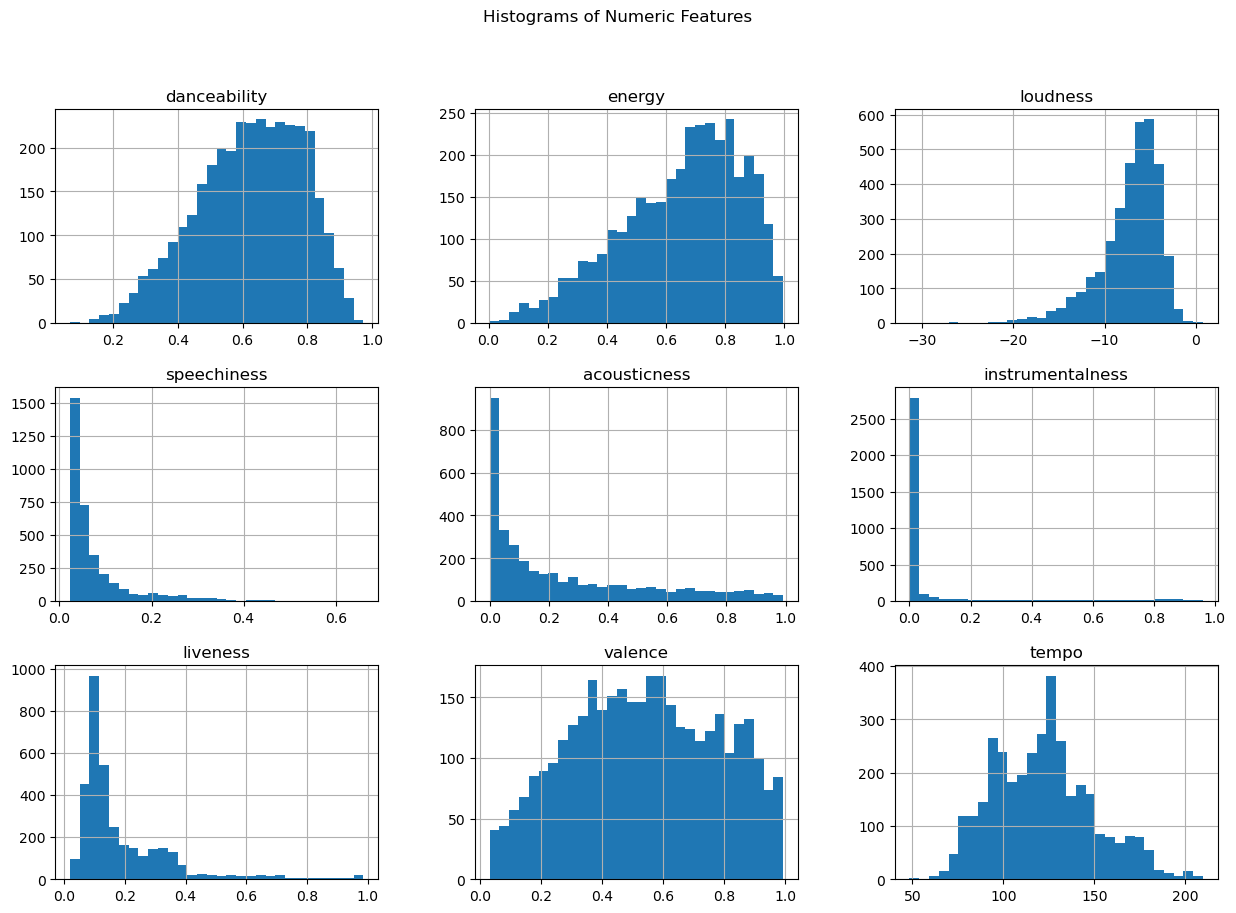

In [8]:
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

5. Boxplots (outliers)

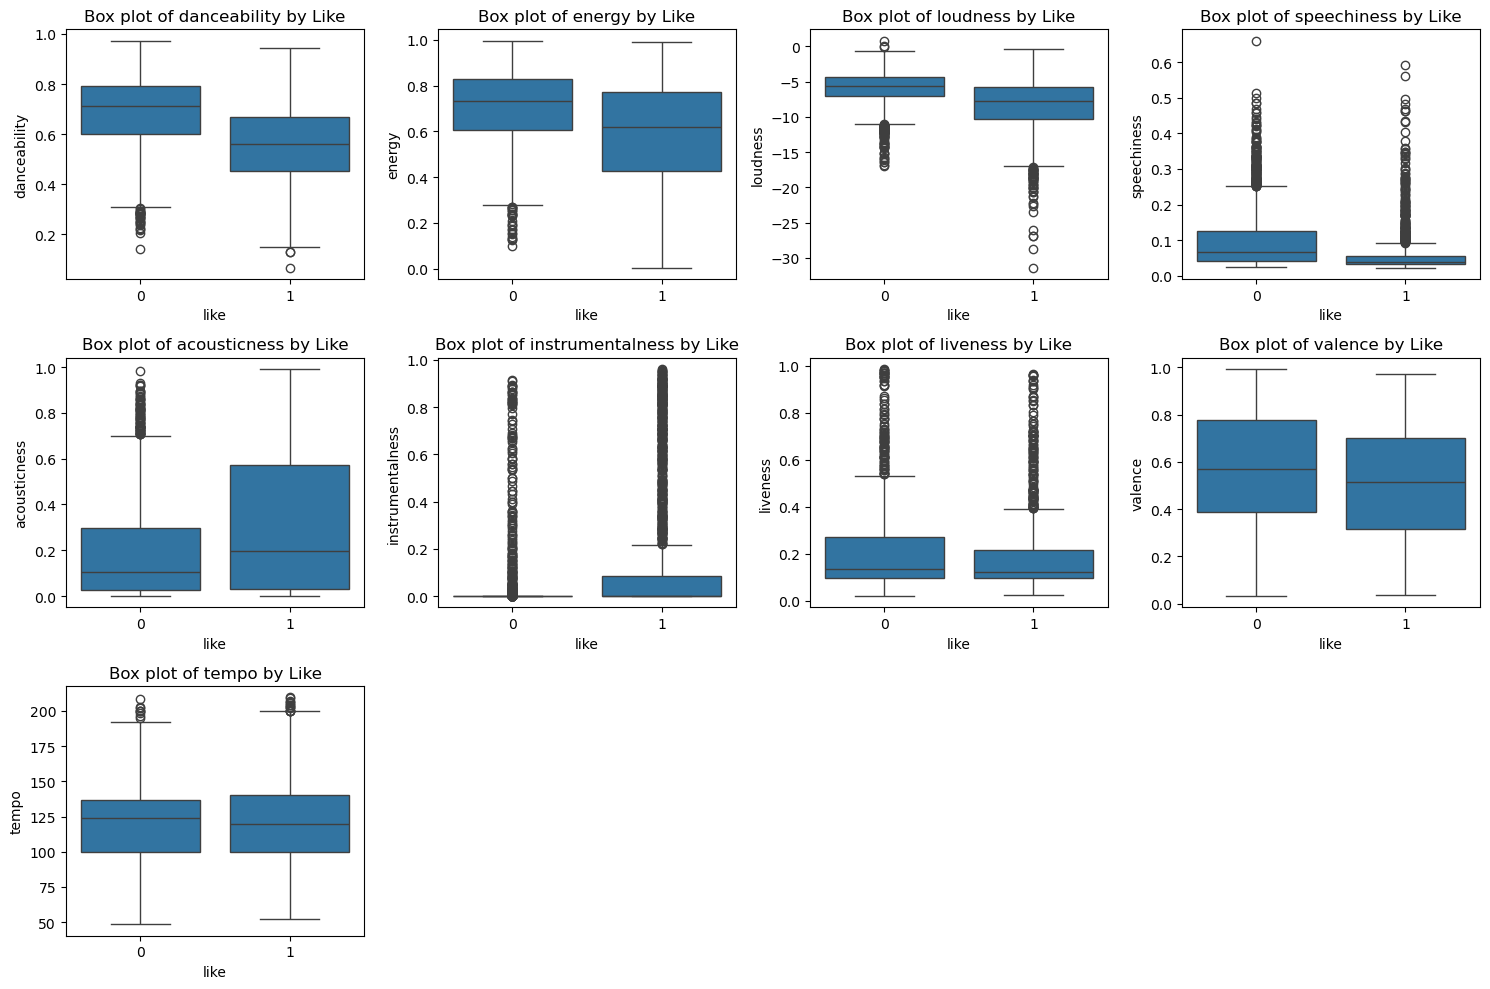

In [9]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x='like', y=column)
    plt.title(f'Box plot of {column} by Like')
plt.tight_layout()
plt.show()

6. Correlation analysis

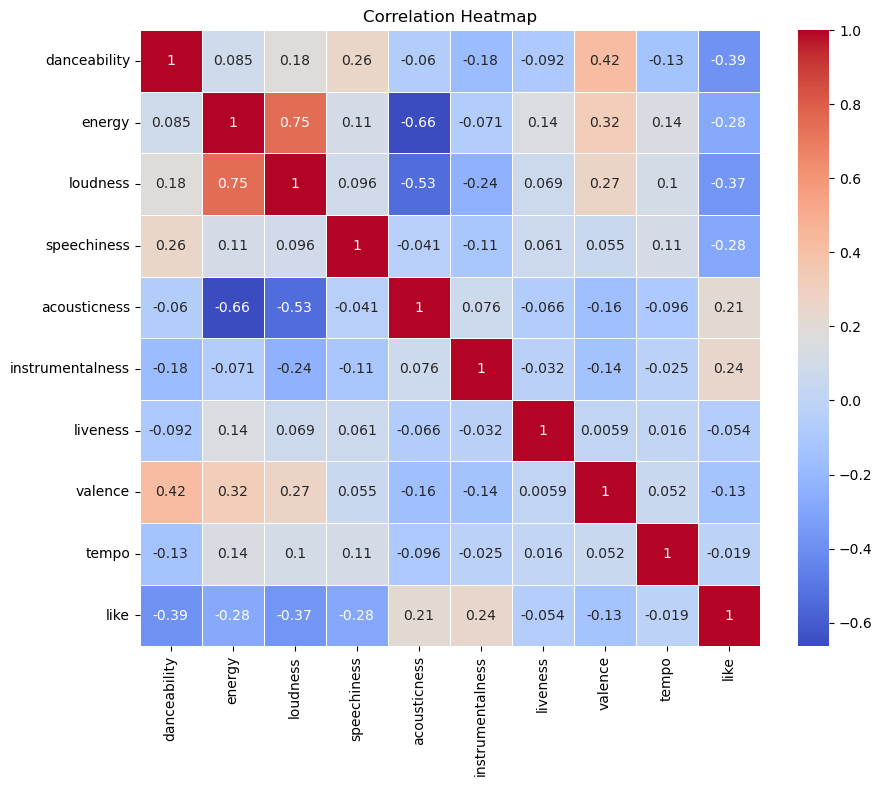

In [10]:
correlation_matrix = df[numeric_columns + ['like']].corr()
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


7. Pairwise plots for selected features with the target variable `like`

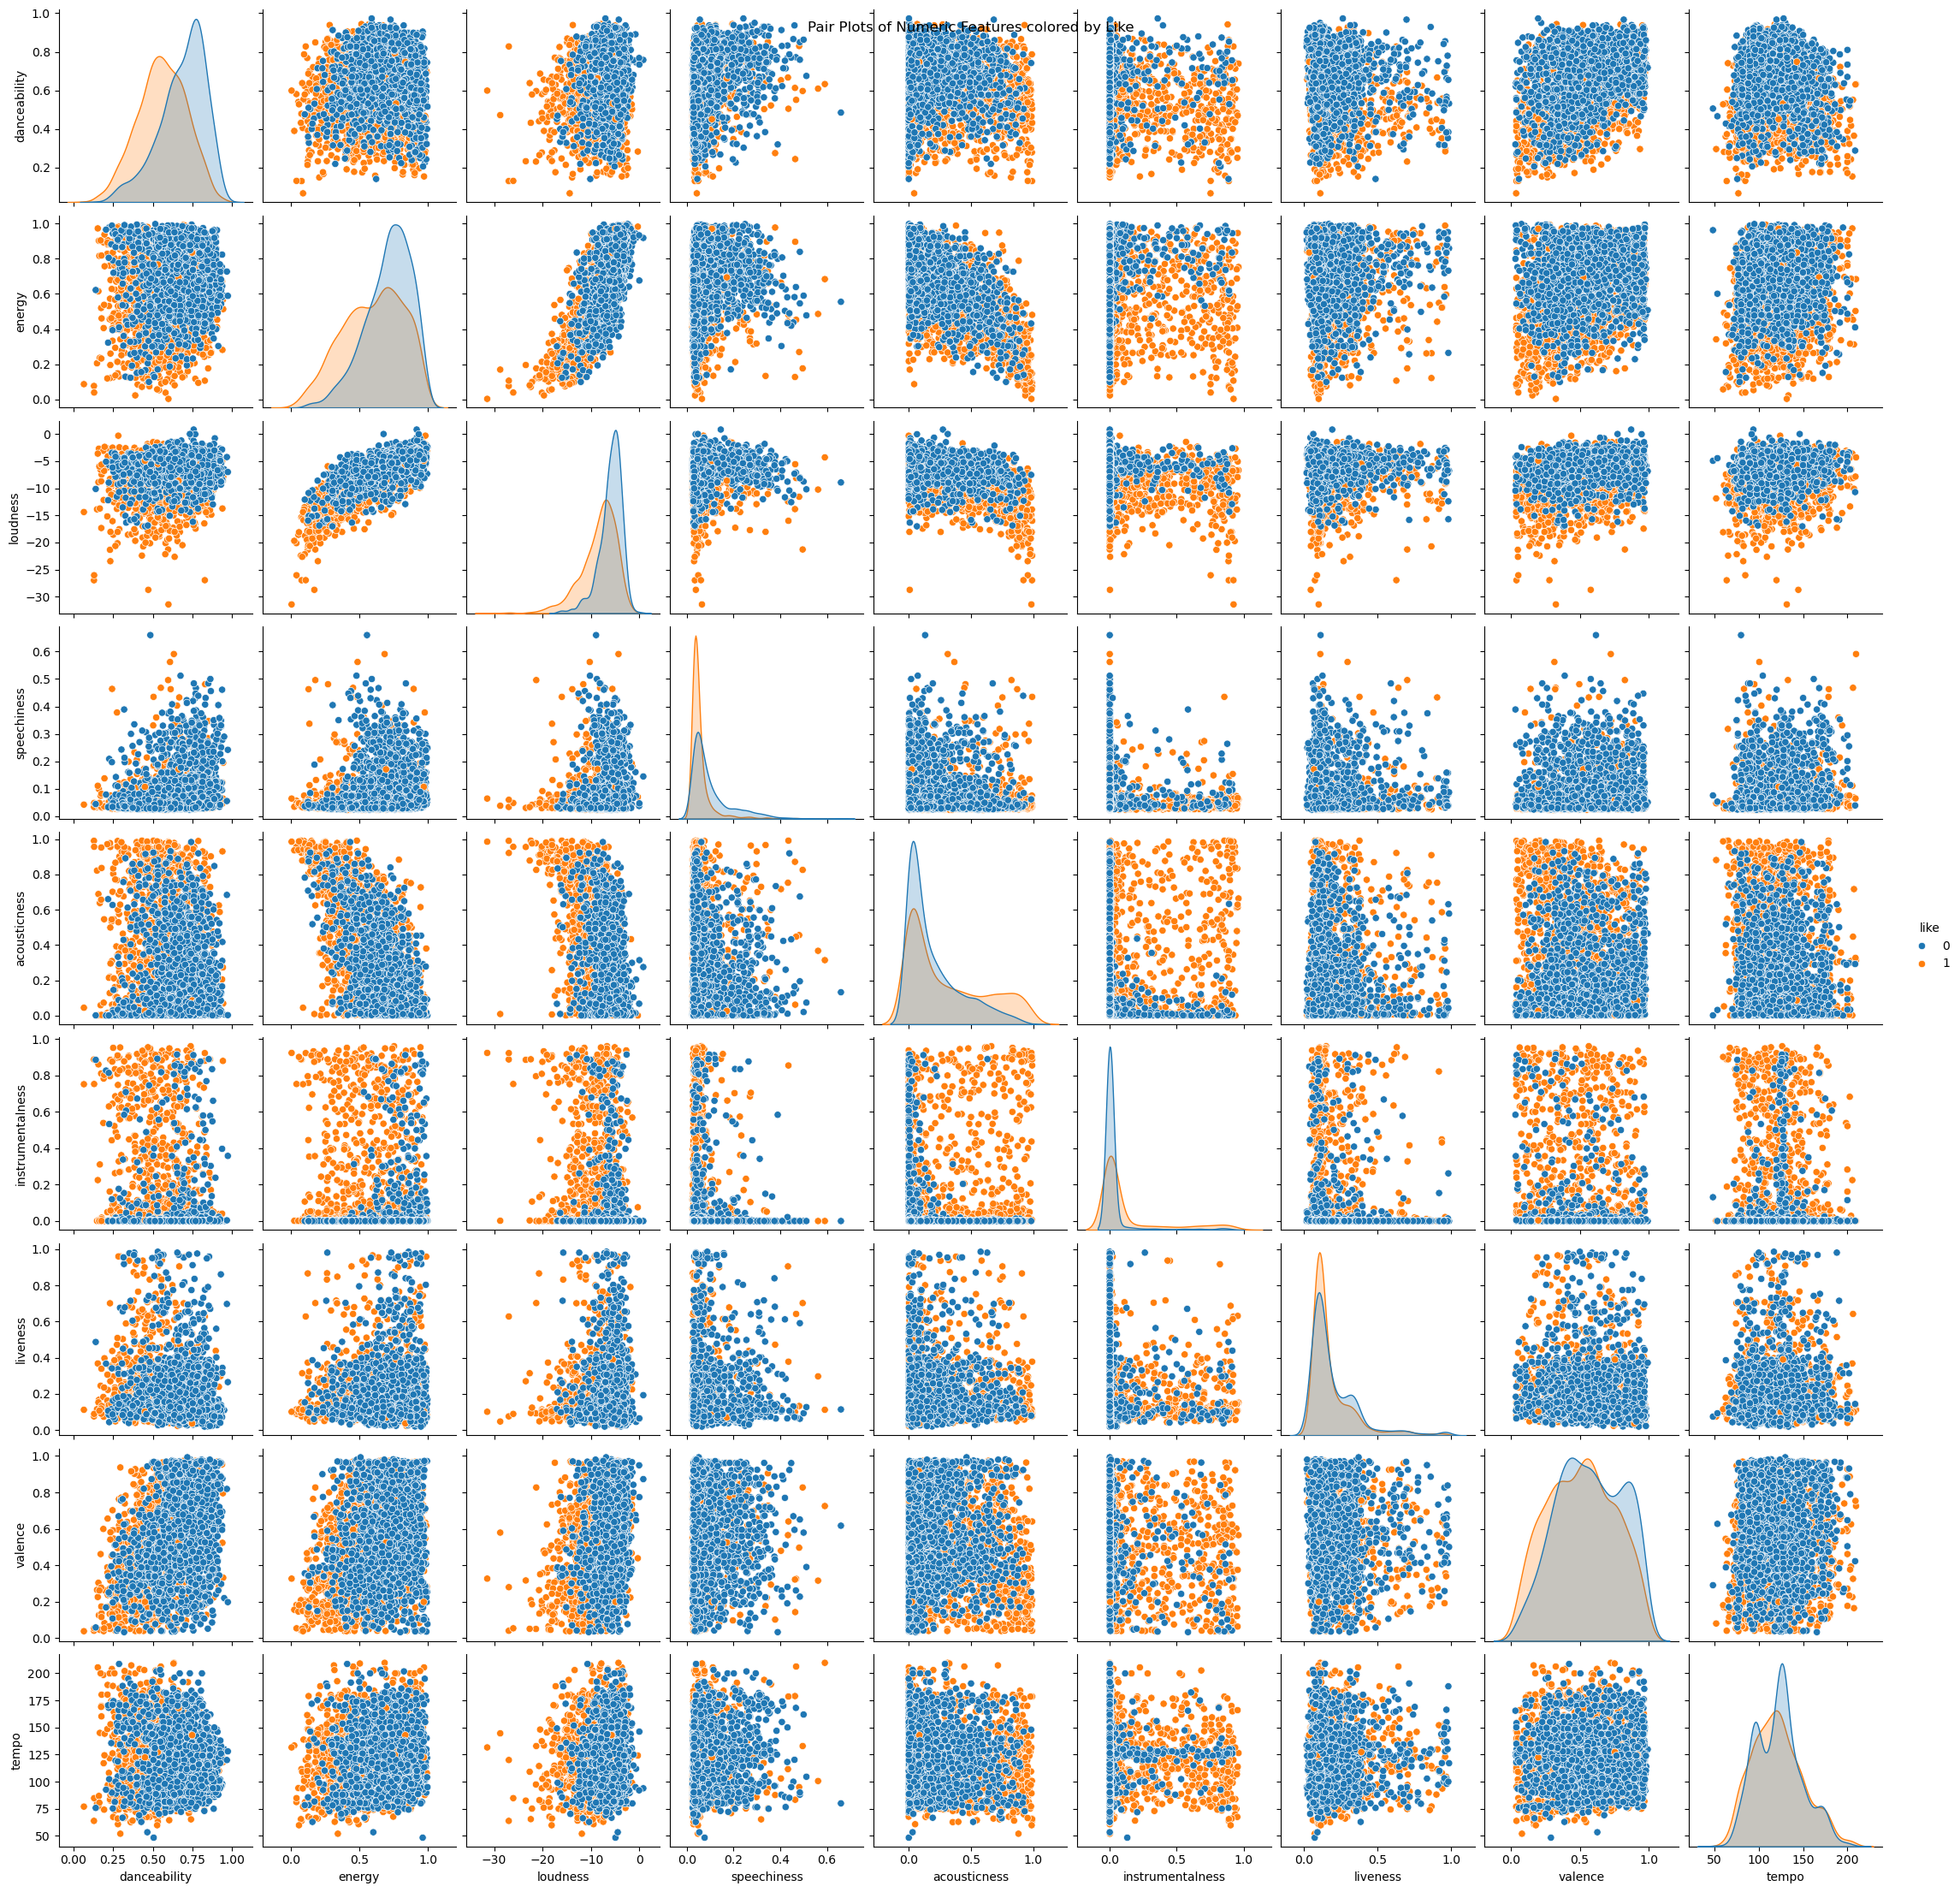

In [11]:
sns.pairplot(df, vars=numeric_columns, hue='like', diag_kind='kde')
plt.suptitle('Pair Plots of Numeric Features colored by Like')
plt.show()

8. Categorical Analysis for Key and Mode and Time signature

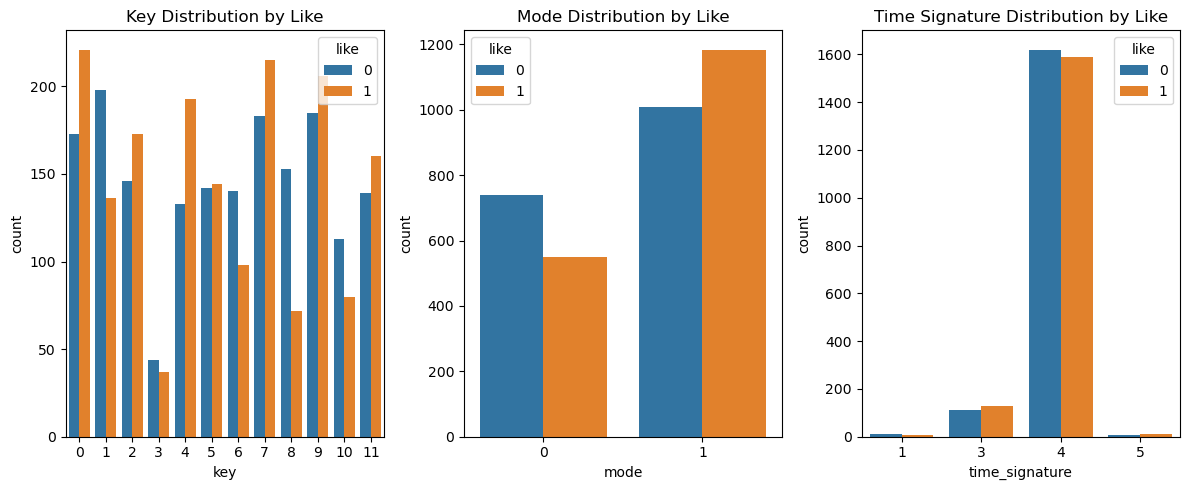

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='key', hue='like', data=df)
plt.title('Key Distribution by Like')

# Mode distribution
plt.subplot(1, 3, 2)
sns.countplot(x='mode', hue='like', data=df)
plt.title('Mode Distribution by Like')

# Time signature distribution
plt.subplot(1, 3, 3)
sns.countplot(x='time_signature', hue='like', data=df)
plt.title('Time Signature Distribution by Like')

plt.tight_layout()
plt.show()